# Jack Taylor

# CA05 - A - Logistic Regression

# The Application

Cardiovascular Disease (CVD) kills more people than cancer globally. A dataset of real heart patients collected from a 15 year heart study cohort is made available for this assignment. The dataset has 16 patient features. Note that none of the features include any Blood Test information.

# Data Source and Description

Data File Name: cvd_data.csv

File Location: https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv

# Program Initialization Section

**Enter your import packages here**

In [34]:
import pandas as pd

import numpy as np

from sklearn import linear_model

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from sklearn import metrics

# Data File Reading Section

In [8]:
data = pd.read_csv('cvd_data.csv')
data.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


# Initial Data Investigation Section

**Summarized Details**

Descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values.

In [9]:
# Statistical Description of data

data.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [10]:
# Displaying number of total rows and columns of the dataset

data.shape

(3242, 17)

In [11]:
# Displaying number of non-null values for each column

data.count()

cvd_4types      3242
age_s1          3242
race            3242
educat          3242
mstat           3242
hip             3242
neck20          3242
waist           3242
av_weight_kg    3242
cgpkyr          3242
tea15           3242
srhype          3242
parrptdiab      3242
bend25          3242
happy25         3242
tired25         3242
hlthlm25        3242
dtype: int64

In [12]:
# Displaying number of null values for each column

data.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [13]:
# Displaying range, column, number of non-nulll objects of each column, datatype and memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


# Deliverables 

**Part 1:** Building a binary classifier model to predict the CVD Risk using a Logistic Regression Model

In [15]:
# Selecting Features
#Splitting the dataset in features and target variable

feature_cols = ['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20', 'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab', 'bend25', 'happy25', 'tired25', 'hlthlm25']
X = data[feature_cols] #Features
y = data['cvd_4types'] #Target variable

In [19]:
#Splitting X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [148]:
#Model Development
# Fit (train) the Logisitic Regression classifier

clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg', penalty='l2', verbose=1) #tested using liblinear, lbfgs, and newton-cg
fitted_model = clf.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [149]:
#Prediction
prediction_result = clf.predict(X_test)

In [150]:
# Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, prediction_result)

cnf_matrix # 138 and 412 correctly made predictions

array([[138, 179],
       [ 82, 412]])

Text(0.5, 257.44, 'Predicted')

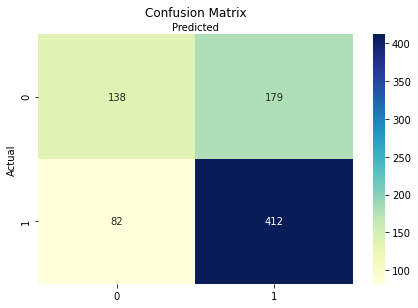

In [151]:
# Visualizing the confusion matrix with a heatmap

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

**Part 2:** Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk

In [152]:
# Get the coefficients

print(fitted_model.coef_)

[[ 7.01083622e-04 -1.03965950e+00  2.62263930e-01 -1.46845056e-01
  -5.93025209e-02 -4.52408182e-02  8.36004122e-02 -3.00145643e-02
   1.91400779e-05 -5.37010933e-02  1.55236191e-01  6.36949655e-01
   1.31544076e-01 -8.77669724e-02  1.15359693e-01 -5.91452572e-01]]


In [153]:
# Multiply the coefficients by standard deviation

converted_coef = (np.std(X, 0)*fitted_model.coef_[0])
print(converted_coef)

age_s1          0.007290
race           -0.372387
educat          0.183015
mstat          -0.137113
hip            -0.609560
neck20         -0.185504
waist           1.136628
av_weight_kg   -0.235567
cgpkyr          0.000386
tea15          -0.066710
srhype          0.072874
parrptdiab      0.159858
bend25          0.088405
happy25        -0.083514
tired25         0.117776
hlthlm25       -0.363242
dtype: float64


**Part 3:** Evaluate the performance of the model (including ROC Curve)

In [154]:
# Model Accuracy

print("Accuracy:" ,metrics.accuracy_score(y_test, prediction_result))

# Model Precision

print("Precision:" ,metrics.precision_score(y_test, prediction_result))

# Model Recall

print("Recall:" ,metrics.recall_score(y_test, prediction_result))

Accuracy: 0.6781750924784217
Precision: 0.6971235194585449
Recall: 0.8340080971659919


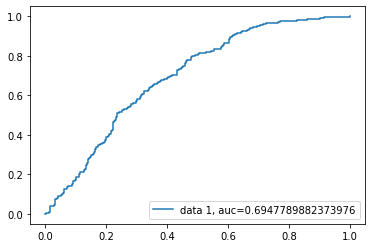

In [155]:
# ROC Curve

y_pred_proba = fitted_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()